<hr style="border-width:4px; border-color:coral"/>

# Creating fractals
<hr style="border-width:4px; border-color:coral"/>

Fractals are fascinating images that can be computed using a very simple fixed-point type iteration.  And because the iterations run independently, algorithms for fractal generation parallelize very naturally.  The code below illustrate the Julia fractal.  You can read more about Julia fractals on this <a href="https://en.wikipedia.org/wiki/Julia_set">Wikipedia page</a>.

Your assignment is to write an MPI/CUDA code to generate the fractal, and write out the solution and plot it in a notebook.  Ultimately, you can create image files for a continuum of Julia sets, and plot the animation of the sets in teh notebook as well.  

In [3]:
%matplotlib notebook
%pylab

from matplotlib import colors
import warnings

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [4]:
def julia_set(xmin, xmax, ymin, ymax, nx, ny, maxiter,c):
    Xe = linspace(xmin, xmax, nx+1).astype(float32)
    Ye = linspace(ymin, ymax, ny+1).astype(float32)
    Xc = Xe[:-1] + (xmax-xmin)/(2*nx)            
    Yc = Ye[:-1] + (ymax-ymin)/(2*ny)            

    Zc = Xc + Yc[:, None] * 1j
    C = zeros_like(Zc) + c
    escape_time = zeros_like(Zc,dtype=int)
    for n in range(maxiter):
        I = logical_and(greater(abs(Zc), 2.0),equal(escape_time,0))
        escape_time[I] = n
        notI = not_equal(I,True)
        Zc[notI] = Zc[notI]**2 + C[notI]
    escape_time[escape_time == 0] = 0
    return Zc, escape_time

In [5]:
%%time

DIM = 2048

# Zoomed fractal
d = 0.01
xc = 1.15657568
yc = -0.1002331

# Full fractal
d = 4
xc = 0
yc = 0

xmin,xmax = xc - d/2, xc + d/2
ymin,ymax = yc - d/2, yc + d/2
maxiter = 400

c = -0.4 + 0.6*1j
# c = -0.7269 + 0.1889*1j
c = -0.8+0.156*1j

warnings.simplefilter("ignore")   # Suppress run time warnings
Z, M = julia_set(xmin, xmax, ymin, ymax, DIM,DIM, maxiter,c)

CPU times: user 1min 28s, sys: 4.53 s, total: 1min 33s
Wall time: 27 s


<IPython.core.display.Javascript object>


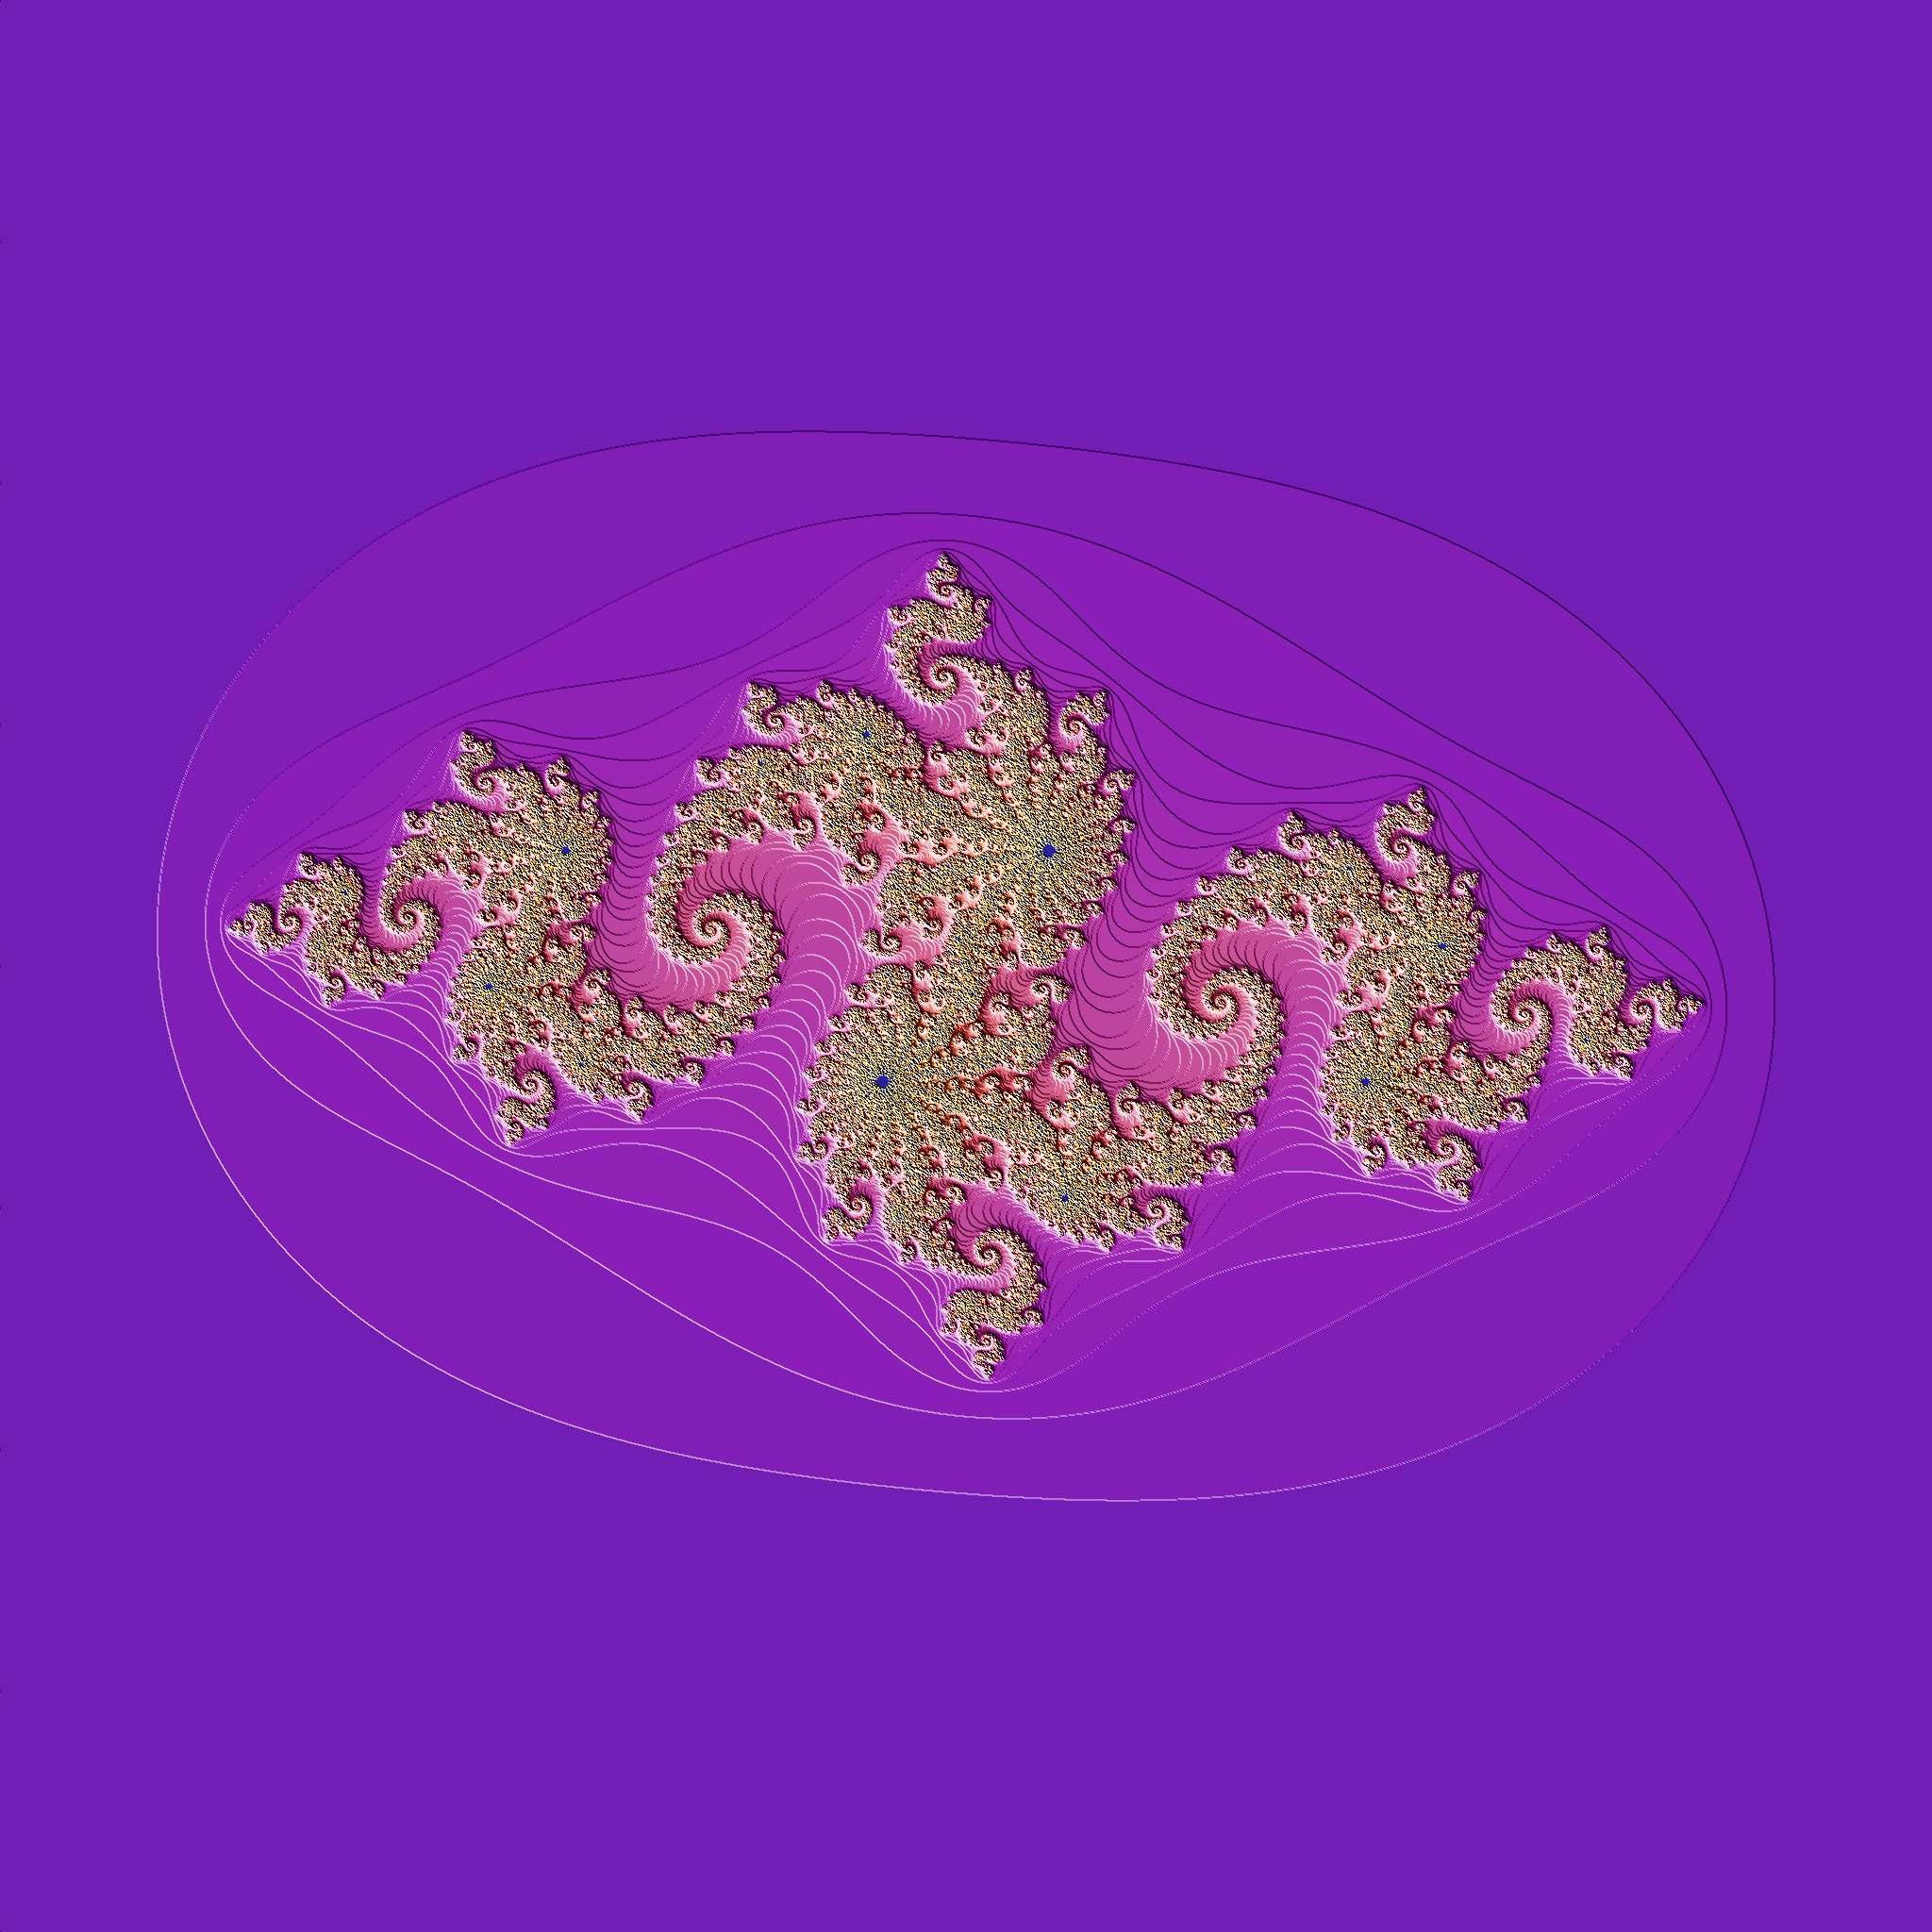

CPU times: user 4.91 s, sys: 1.01 s, total: 5.91 s
Wall time: 3.69 s


In [6]:
%%time

dpi = 256    # Figure might not show up in the notebook if dpi is too high;  but PNG file will be created (below).
width = DIM/dpi     # Final figure size (in pixels) :  dpi*[width,height]
height = DIM/dpi
fig = plt.figure(figsize=(width, height), dpi=dpi)
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

# Shaded rendering
light = colors.LightSource(azdeg=315, altdeg=10)
M_plot = light.shade(M, cmap=plt.cm.plasma, vert_exag=1.5,
                norm=colors.PowerNorm(0.3), blend_mode='hsv')
plt.imshow(M_plot, extent=[xmin, xmax, ymin, ymax],interpolation='bicubic',origin='lower')

plt.savefig("fractal.png")
plt.show()